## Start

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fast_gen import *
from learner import *
from pt_models import *
from dataset_pt import *
from sgdr_pt import *

In [3]:
bs=48; sz=64
f_model = resnet34
path = "/data/jhoward/fast/dogscats/"

In [4]:
augs = [RandomRotate(10), RandomFlip(), RandomLighting(0.05, 0.05)]
tfms = ClassifierData.tfms_from_model(f_model, sz, aug_tfms=augs, max_zoom=1.1)
ds = ClassifierData.from_paths(path, bs, tfms)

In [31]:
learn = Learner.pretrained_convnet(resnet34, ds, opt_fn=SGD_Momentum(0.9), ps=0.2, xtra_fc=[512])

-- freeze 9999


In [25]:
lrf=learn.lr_find(True)

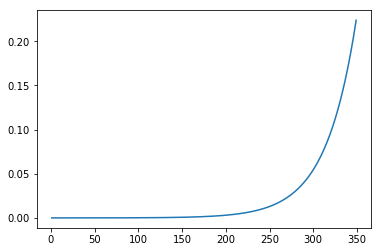

In [26]:
lrf.plot_lr()

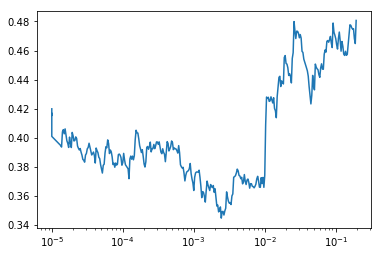

In [27]:
lrf.plot()

In [32]:
learn.fit_fc(2, 1e-3, cycle_len=1)

[0.3921170784063288, 0.2792834, 0.88268852]


[0.3530264628851818, 0.26927891, 0.87673599]



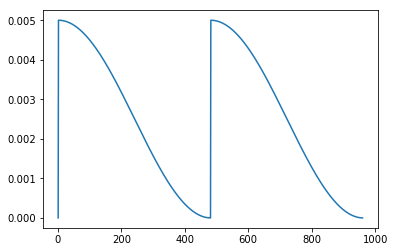

In [53]:
learn.sched.plot_lr()

In [33]:
learn.fit(2, 1e-4, cycle_len=1)

[0.36550992960027134, 0.26784104, 0.88120025]


[0.28663897373393354, 0.26756716, 0.88764882]



In [11]:
learn.freeze_to(-4)

-- freeze -4


In [45]:
lrf = learn.lr_find(start_lr=1e-7)

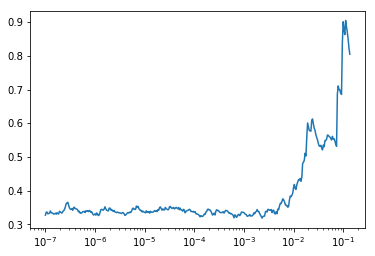

In [46]:
lrf.plot()

In [12]:
learn.fit(4, 1e-3, cycle_len=2)

[0.23243338710257738, 0.20125158, 0.91914678]


[0.2147951538098448, 0.19776906, 0.92013878]


[0.1938439735358934, 0.18840908, 0.92609131]


[0.20277535508746788, 0.17776999, 0.93105155]



## End

In [ ]:
tfm=lambda x: apply_gen(x, augs+[RandomScaleCenter(128, 1.05)])
ds = ClassifierData.from_paths(path, tfm, tfm, 2)
x,y=next(iter(ds.val_dl))
plt.imshow(x[0].numpy());

In [ ]:
PIL.Image.open(ds_scl.val_dl.dataset.fnames[0])